# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np

---
## 2. Load data

In [2]:
df = pd.read_csv('./client_data.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
monthly_price_by_id

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,40.728885
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,40.728885
...,...,...,...,...
77283,fffc0cacd305dd51f316424bbb08d1bd,2015-08-01,0.151399,41.228885
77284,fffc0cacd305dd51f316424bbb08d1bd,2015-09-01,0.151399,41.228885
77285,fffc0cacd305dd51f316424bbb08d1bd,2015-10-01,0.151399,41.228885
77286,fffc0cacd305dd51f316424bbb08d1bd,2015-11-01,0.151399,41.228885


In [6]:
# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()
jan_prices

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0010ee3855fdea87602a5b7aba8e42de,2015-01-01,0.123086,40.565969
2,00114d74e963e47177db89bc70108537,2015-01-01,0.149434,44.266931
3,001cd16732dc7d5bdf46b0d49996c271,2015-01-01,0.152445,44.266931
4,001dc71143f45cb58aaccc2e94823c5a,2015-01-01,0.148825,44.266931
...,...,...,...,...
6442,ffd40bb684b4f82c2c16d50f7ed0258e,2015-01-01,0.125976,40.565969
6443,ffd619330ca153638aca1f0c03ddaea2,2015-01-01,0.150211,44.266931
6444,ffe036e88380923f0b016b8a8adc75b3,2015-01-01,0.149902,44.266931
6445,fffac626da707b1b5ab11e8431a4d0a2,2015-01-01,0.148825,44.266931


In [7]:
# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
2,00114d74e963e47177db89bc70108537,-0.003994,-0.000001
3,001cd16732dc7d5bdf46b0d49996c271,0.047697,2.177779
4,001dc71143f45cb58aaccc2e94823c5a,-0.003778,0.177779


In [8]:
price_df['id'].value_counts()

038af19179925da21a25619c5a24b745    12
c2e8a65a36122b904544df8ebd77e64f    12
500fe4c593feab3c998c7dfe18da705a    12
cc7bb3da645cbea795d499e6a7c10c0a    12
f4a70efdb22957fb97ab5a0cd5eb67fe    12
                                    ..
85781e805f208ddbcd9eeac081ed2615     9
223a98d3832ece78cbf279a194868b54     8
3e459d61dc831e29f8a9a9a59f95efd2     8
c5dcd5c506e565aaabffa29bc1ec0a37     7
8da555fd7fb1ad45a5485ca1d9f1e84b     2
Name: id, Length: 6447, dtype: int64

**Comment from Uno:**


*This above part of feature engineering is provided by BCG, but it is not appropriate to name this part "Jan-Dec-Difference", because some clients did not have data for 12 months (i.e., they dropped out or they started using PowerCo products some day during the year).*


-------------------------------------------------------------------

Now that you have a dataset of cleaned and engineered features, it is time to build a predictive model to see how well these features are able to predict a customer churning. It is your task to train a Random Forest classifier and to evaluate the results in an appropriate manner. We would also like you to document the advantages and disadvantages of using a Random Forest for this use case. It is up to you how to fulfill this task, but you may want to use the below points to guide your work:

Ensure you’re able to explain the performance of your model, where did the model underperform?
Why did you choose the evaluation metrics that you used? Please elaborate on your choices.
Document the advantages and disadvantages of using the Random Forest for this use case.
Do you think that the model performance is satisfactory? Give justification for your answer.
(Bonus) - Relate the model performance to the client's financial performance with the introduction of the discount proposition. How much money could a client save with the use of the model? What assumptions did you make to come to this conclusion?
You should spend 1 - 1.5 hours on this. When it comes to model evaluation and the explanation of your results, feel free to use the additional links below.

# **Sub-Task 1**



*   Think of ways to evaluate a feature against a label.
*   Think of ways to add new features which would complement the already existing ones. 
*   Think of feature granularity. 
*   Remove unnecessary features.

In [9]:
df['id'].value_counts()

24011ae4ebbe3035111d65fa7c15bc57    1
2fae70276cd7a4874a2aefcd68d5a184    1
a7a9dac0ffc2ad56c66a1b08d53d0e51    1
6cfbce2099a4163ea4fe422fb28829ea    1
4289e929ecd35a0754e697feb24a091b    1
                                   ..
0b69432a3ceee7763bf86ffe30c6bc2d    1
6cabca88c760284183f51f84e4a27b1e    1
de92494d7140dc94be6a1ebafaf98056    1
a8e828bfad0869527e9acdd39a36cc91    1
563dde550fd624d7352f3de77c0cdfcd    1
Name: id, Length: 14606, dtype: int64

In [10]:
#Calculate the duration of client contract
df['contract_during']=df['date_end']-df['date_activ']
df['contract_during']=df['contract_during'].apply(lambda x:x.days)

In [11]:
# Calculate the deviation of last month bill from the average of last 12 months.
df['bill_devia']=(df['cons_12m']/12)-df['cons_last_month']

In [12]:
def handleInf(x):
  if x==float('-inf') or x==float('inf') or x == float('nan') or np.isnan(x):
    return 0
  else:
    return x

In [13]:
# Calculate the trend of last 12-m consumption to next 12-m forecasted consumption
df['cons_trend']=df['forecast_cons_12m']/df['cons_12m']
df['cons_trend']=df['cons_trend'].apply(lambda x: handleInf(x))
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_during,bill_devia,cons_trend
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,1096,0.000000,0.000000
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2566,388.333333,0.040762
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2192,45.333333,0.088162
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2192,132.000000,0.151540
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,2245,-157.250000,0.100734


In [14]:
diff = diff.rename(columns={'offpeak_diff_dec_january_energy':'offpeak_diff_end_start_energy','offpeak_diff_dec_january_power':'offpeak_diff_end_start_power'})
diff.head()

,id,offpeak_diff_end_start_energy,offpeak_diff_end_start_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
2,00114d74e963e47177db89bc70108537,-0.003994,-0.000001
3,001cd16732dc7d5bdf46b0d49996c271,0.047697,2.177779
4,001dc71143f45cb58aaccc2e94823c5a,-0.003778,0.177779


In [15]:
price_df

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
...,...,...,...,...,...,...,...,...
77283,10e6828ddd62cbcf687cb74928c4c2d2,2015-10-01,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555
77284,10e6828ddd62cbcf687cb74928c4c2d2,2015-11-01,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555
77285,10e6828ddd62cbcf687cb74928c4c2d2,2015-12-01,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555
77286,8da555fd7fb1ad45a5485ca1d9f1e84b,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389


In [16]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean',
                                                                  'price_peak_var': 'mean', 'price_peak_fix': 'mean',
                                                                  'price_mid_peak_var': 'mean', 'price_mid_peak_fix': 'mean',
                                                                  }).reset_index()
monthly_price_by_id

,id,price_date,price_off_peak_var,price_off_peak_fix,price_peak_var,price_peak_fix,price_mid_peak_var,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969,0.103975,24.339581,0.070232,16.226389
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969,0.103975,24.339581,0.070232,16.226389
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885,0.105842,24.437330,0.073773,16.291555
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,40.728885,0.105842,24.437330,0.073773,16.291555
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,40.728885,0.105842,24.437330,0.073773,16.291555
...,...,...,...,...,...,...,...,...
77283,fffc0cacd305dd51f316424bbb08d1bd,2015-08-01,0.151399,41.228885,0.126871,24.937330,0.091394,16.791555
77284,fffc0cacd305dd51f316424bbb08d1bd,2015-09-01,0.151399,41.228885,0.126871,24.937330,0.091394,16.791555
77285,fffc0cacd305dd51f316424bbb08d1bd,2015-10-01,0.151399,41.228885,0.126871,24.937330,0.091394,16.791555
77286,fffc0cacd305dd51f316424bbb08d1bd,2015-11-01,0.151399,41.228885,0.126871,24.937330,0.091394,16.791555


In [17]:
# Get start and end prices
start_prices = monthly_price_by_id.groupby('id').first().reset_index()
end_prices = monthly_price_by_id.groupby('id').last().reset_index()
end_prices['price_date'].value_counts()

2015-12-01    6446
2015-02-01       1
Name: price_date, dtype: int64

In [18]:
start_prices['price_date'].value_counts()

2015-01-01    6437
2015-04-01       4
2015-02-01       3
2015-05-01       2
2015-06-01       1
Name: price_date, dtype: int64

In [19]:
# Calculate the difference
diff = pd.merge(end_prices.rename(columns={'price_off_peak_var': 'end_1', 'price_off_peak_fix': 'end_2',
                                           'price_peak_var': 'end_3', 'price_peak_fix': 'end_4',
                                           'price_mid_peak_var': 'end_5', 'price_mid_peak_fix': 'end_6',
                                           }), start_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_end_start_energy'] = diff['end_1'] - diff['price_off_peak_var']
diff['offpeak_diff_end_start_power'] = diff['end_2'] - diff['price_off_peak_fix']
diff['peak_diff_end_start_energy'] = diff['end_3'] - diff['price_peak_var']
diff['peak_diff_end_start_power'] = diff['end_4'] - diff['price_peak_fix']
diff['midpeak_diff_end_start_energy'] = diff['end_5'] - diff['price_mid_peak_var']
diff['midpeak_diff_end_start_power'] = diff['end_6'] - diff['price_mid_peak_fix']
diff = diff[['id', 'offpeak_diff_end_start_energy','offpeak_diff_end_start_power',
             'peak_diff_end_start_energy','peak_diff_end_start_power',
             'midpeak_diff_end_start_energy','midpeak_diff_end_start_power']]
diff

,id,offpeak_diff_end_start_energy,offpeak_diff_end_start_power,peak_diff_end_start_energy,peak_diff_end_start_power,midpeak_diff_end_start_energy,midpeak_diff_end_start_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166
1,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916,-0.005120,0.097749,0.000763,0.065166
2,00114d74e963e47177db89bc70108537,-0.003994,-0.000001,0.000000,0.000000,0.000000,0.000000
3,001cd16732dc7d5bdf46b0d49996c271,0.047697,2.177779,0.000000,0.000000,0.000000,0.000000
4,001dc71143f45cb58aaccc2e94823c5a,-0.003778,0.177779,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
6442,ffd40bb684b4f82c2c16d50f7ed0258e,-0.008381,0.162916,-0.003484,0.097749,0.002400,0.065166
6443,ffd619330ca153638aca1f0c03ddaea2,-0.003423,0.177779,0.000000,0.000000,0.000000,0.000000
6444,ffe036e88380923f0b016b8a8adc75b3,-0.004855,0.177779,0.000000,0.000000,0.000000,0.000000
6445,fffac626da707b1b5ab11e8431a4d0a2,-0.003778,0.177779,0.000000,0.000000,0.000000,0.000000


In [20]:
data = pd.merge(df.drop(labels = ['date_activ','date_end','date_modif_prod','date_renewal'],axis = 1), diff, on='id')
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,churn,contract_during,bill_devia,cons_trend,offpeak_diff_end_start_energy,offpeak_diff_end_start_power,peak_diff_end_start_energy,peak_diff_end_start_power,midpeak_diff_end_start_energy,midpeak_diff_end_start_power
0,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0,2192,45.333333,0.088162,-0.004670,0.177779,0.000528,0.000000,0.00000,0.000000
1,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,864.73,751,0.0,144.49,0.115174,...,0,2192,1202.666667,0.029261,-0.007801,0.162916,-0.002904,0.097749,0.00298,0.065166
2,d5e512dbc8118a830a7b8c7f61d89992,usilxuppasemubllopkaafesmlibmsdf,10831,0,3112,1204.58,3112,0.0,20.94,0.164637,...,0,1827,-2209.416667,0.111216,-0.001547,0.177779,0.003677,0.000000,0.00000,0.000000
3,21860c2ff2d5df75503b230ce629c253,foosdfpfkusacimwkcsosbicdxkicaua,7726,0,0,914.10,0,0.0,74.66,0.162327,...,0,1461,643.833333,0.118315,-0.008152,0.177779,-0.002954,0.000000,0.00000,0.000000
4,e4773b60d2e68aac94795782abfc006b,lmkebamcaaclubfxadlmueccxoimlema,47019,0,3161,1687.29,1080,0.0,16.08,0.144902,...,0,1461,757.250000,0.035885,-0.003423,0.177779,0.000000,0.000000,0.00000,0.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5846 entries, 0 to 5845
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5846 non-null   object 
 1   channel_sales                   5846 non-null   object 
 2   cons_12m                        5846 non-null   int64  
 3   cons_gas_12m                    5846 non-null   int64  
 4   cons_last_month                 5846 non-null   int64  
 5   forecast_cons_12m               5846 non-null   float64
 6   forecast_cons_year              5846 non-null   int64  
 7   forecast_discount_energy        5846 non-null   float64
 8   forecast_meter_rent_12m         5846 non-null   float64
 9   forecast_price_energy_off_peak  5846 non-null   float64
 10  forecast_price_energy_peak      5846 non-null   float64
 11  forecast_price_pow_off_peak     5846 non-null   float64
 12  has_gas                         58

In [22]:
# channel_sales (2) and origin_up (19) are the two categorical objects. we need to encode them before modelling.
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2,19])], remainder='passthrough')
# X = ct.fit_transform(X)
data['channel_sales'] = data['channel_sales'].astype('category')
data['channel_sales'] = data['channel_sales'].cat.codes.astype('category')
data['channel_sales'] = data['channel_sales'].astype('int')
data['origin_up'] = data['origin_up'].astype('category')
data['origin_up'] = data['origin_up'].cat.codes.astype('category')
data['origin_up'] = data['origin_up'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5846 entries, 0 to 5845
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5846 non-null   object 
 1   channel_sales                   5846 non-null   int64  
 2   cons_12m                        5846 non-null   int64  
 3   cons_gas_12m                    5846 non-null   int64  
 4   cons_last_month                 5846 non-null   int64  
 5   forecast_cons_12m               5846 non-null   float64
 6   forecast_cons_year              5846 non-null   int64  
 7   forecast_discount_energy        5846 non-null   float64
 8   forecast_meter_rent_12m         5846 non-null   float64
 9   forecast_price_energy_off_peak  5846 non-null   float64
 10  forecast_price_energy_peak      5846 non-null   float64
 11  forecast_price_pow_off_peak     5846 non-null   float64
 12  has_gas                         58

In [23]:
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,churn,contract_during,bill_devia,cons_trend,offpeak_diff_end_start_energy,offpeak_diff_end_start_power,peak_diff_end_start_energy,peak_diff_end_start_power,midpeak_diff_end_start_energy,midpeak_diff_end_start_power
0,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,47.96,0,0.0,38.72,0.165794,...,0,2192,45.333333,0.088162,-0.004670,0.177779,0.000528,0.000000,0.00000,0.000000
1,01495c955be7ec5e7f3203406785aae0,4,29552,0,1260,864.73,751,0.0,144.49,0.115174,...,0,2192,1202.666667,0.029261,-0.007801,0.162916,-0.002904,0.097749,0.00298,0.065166
2,d5e512dbc8118a830a7b8c7f61d89992,7,10831,0,3112,1204.58,3112,0.0,20.94,0.164637,...,0,1827,-2209.416667,0.111216,-0.001547,0.177779,0.003677,0.000000,0.00000,0.000000
3,21860c2ff2d5df75503b230ce629c253,4,7726,0,0,914.10,0,0.0,74.66,0.162327,...,0,1461,643.833333,0.118315,-0.008152,0.177779,-0.002954,0.000000,0.00000,0.000000
4,e4773b60d2e68aac94795782abfc006b,5,47019,0,3161,1687.29,1080,0.0,16.08,0.144902,...,0,1461,757.250000,0.035885,-0.003423,0.177779,0.000000,0.000000,0.00000,0.000000


# **Sub-Task 2**

*   Is this problem best represented as classification or regression? 
*   What kind of model performance do you think is appropriate? 
*   Most importantly how would you measure such a performance? 
*   How would you tie business metrics such as profits or *   savings to the model performance?

In [59]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
y = data["churn"]
X = data.drop(labels = ["id","churn"],axis = 1)
X['has_gas']=X['has_gas'].apply(lambda x:0 if x=='f' else 1)
X.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,pow_max,contract_during,bill_devia,cons_trend,offpeak_diff_end_start_energy,offpeak_diff_end_start_power,peak_diff_end_start_energy,peak_diff_end_start_power,midpeak_diff_end_start_energy,midpeak_diff_end_start_power
0,4,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,13.856,2192,45.333333,0.088162,-0.004670,0.177779,0.000528,0.000000,0.00000,0.000000
1,4,29552,0,1260,864.73,751,0.0,144.49,0.115174,0.098837,...,26.400,2192,1202.666667,0.029261,-0.007801,0.162916,-0.002904,0.097749,0.00298,0.065166
2,7,10831,0,3112,1204.58,3112,0.0,20.94,0.164637,0.087381,...,11.500,1827,-2209.416667,0.111216,-0.001547,0.177779,0.003677,0.000000,0.00000,0.000000
3,4,7726,0,0,914.10,0,0.0,74.66,0.162327,0.084428,...,13.200,1461,643.833333,0.118315,-0.008152,0.177779,-0.002954,0.000000,0.00000,0.000000
4,5,47019,0,3161,1687.29,1080,0.0,16.08,0.144902,0.000000,...,10.392,1461,757.250000,0.035885,-0.003423,0.177779,0.000000,0.000000,0.00000,0.000000


## Normalisation and Preparation

In [31]:
X[['cons_12m']].describe()

,cons_12m
count,5.846000e+03
mean,1.567074e+05
std,5.695564e+05
min,0.000000e+00
25%,5.699250e+03
50%,1.437950e+04
75%,4.172750e+04
max,6.207104e+06


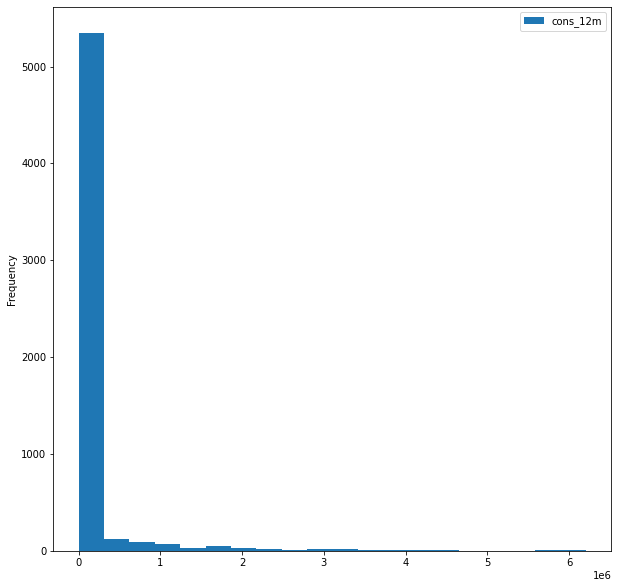

In [41]:
X[['cons_12m']].plot(kind='hist',
                          bins=20,
                          figsize=(10,10))

In [61]:
X_mm = StandardScaler().fit_transform(X)
X_mm

array([[ 0.30718565, -0.27420776, -0.17598738, ...,  0.0068905 ,
        -0.08289718,  0.00535713],
       [ 0.30718565, -0.22327254, -0.17598738, ...,  0.05567135,
         0.35750222,  0.05527551],
       [ 1.70797138, -0.25614479, -0.17598738, ...,  0.0068905 ,
        -0.08289718,  0.00535713],
       ...,
       [ 0.30718565, -0.12214308, -0.17598738, ...,  0.05567135,
         0.34907847,  0.05527551],
       [ 0.30718565, -0.27192509, -0.17598738, ...,  0.05567135,
         0.43242923,  0.05527551],
       [ 0.30718565, -0.27493295, -0.17598738, ...,  0.0068905 ,
        -0.08289718,  0.00535713]])

In [47]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5846 entries, 0 to 5845
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   channel_sales                   5846 non-null   int64  
 1   cons_12m                        5846 non-null   int64  
 2   cons_gas_12m                    5846 non-null   int64  
 3   cons_last_month                 5846 non-null   int64  
 4   forecast_cons_12m               5846 non-null   float64
 5   forecast_cons_year              5846 non-null   int64  
 6   forecast_discount_energy        5846 non-null   float64
 7   forecast_meter_rent_12m         5846 non-null   float64
 8   forecast_price_energy_off_peak  5846 non-null   float64
 9   forecast_price_energy_peak      5846 non-null   float64
 10  forecast_price_pow_off_peak     5846 non-null   float64
 11  has_gas                         5846 non-null   int64  
 12  imp_cons                        58

In [49]:
X = X.astype(float)
X = np.array(X)
X

array([[4.000000e+00, 5.440000e+02, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [4.000000e+00, 2.955200e+04, 0.000000e+00, ..., 9.774936e-02,
        2.980000e-03, 6.516624e-02],
       [7.000000e+00, 1.083100e+04, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [4.000000e+00, 8.714600e+04, 0.000000e+00, ..., 9.774936e-02,
        2.923000e-03, 6.516624e-02],
       [4.000000e+00, 1.844000e+03, 0.000000e+00, ..., 9.774936e-02,
        3.487000e-03, 6.516624e-02],
       [4.000000e+00, 1.310000e+02, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [50]:
y = np.array(y)
y

array([0, 0, 0, ..., 0, 1, 0])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)

In [62]:
X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm, y, test_size=0.25, random_state=18)

## Training and testing

In [53]:
def result_acc(predictions,ifbinary):
  if ifbinary:
    # print("Accuracy =" , round(sm.accuracy_score(y_test, predictions),2))
    # print("Precision =" , round(sm.precision_score(y_test, predictions),2))
    # print("Recall =" , round(sm.recall_score(y_test, predictions),2))
    print(sm.classification_report(y_test, predictions))
  else:
    print("Mean absolute error =", round(sm.mean_absolute_error(y_test, predictions), 2)) 
    print("Mean squared error =", round(sm.mean_squared_error(y_test, predictions), 2)) 
    print("Median absolute error =", round(sm.median_absolute_error(y_test, predictions), 2)) 
    print("Explain variance score =", round(sm.explained_variance_score(y_test, predictions), 2)) 
    print("R2 score =", round(sm.r2_score(y_test, predictions), 2))

In [54]:
class Regressor():
    # init methodd initializes all parameters needed to implement regression
    def __init__(self, learning_rate=0.1, tol=1e-21, seed=None,normalize=False,iter=iter):
        self.W = None
        self.b = None
        self.iter = iter
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        np.random.seed(seed if seed is not None else np.random.randint(100))
    # random initialization of weights and bias
    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
    # compute the error function: sum of squared errors 
    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost
    # implement optimization function (gradient descent)
    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db
    # normalize the dataset by subtracting the mean and dividing by std deviation
    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)
    # fit the model to the dataset: training process
    def fit(self, X, y, verbose=False):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        # while True:
        while len(self.__iterations) < self.iter:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)
    # test the model on test data
    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    # plot the iterations vs cost curves
    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()
    # calculates the accuracy
    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))

In [55]:
regressor = Regressor(normalize=True,iter=5000)
regressor.fit(X_train,y_train)

In [56]:
train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)
print("Train Score:", train_score)
print("Test Score: ",test_score)

Train Score: 0.03631496934038536
Test Score:  0.020130391765262323


In [63]:
regressor = Regressor(normalize=True,iter=5000)
regressor.fit(X_mm_train,y_mm_train)

In [64]:
train_score = regressor.score(X_mm_train,y_mm_train)
test_score = regressor.score(X_mm_test,y_mm_test)
print("Train Score:", train_score)
print("Test Score: ",test_score)

Train Score: 0.036314915926921265
Test Score:  0.020131129749905385


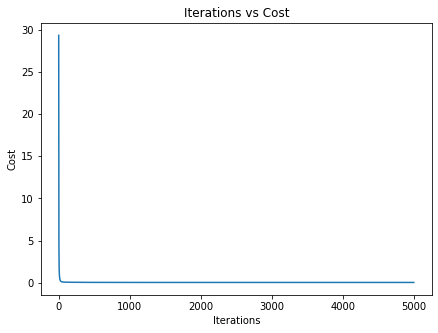

In [65]:
regressor.plot()

In [66]:
predictions = regressor.predict(X_test)
predictions

array([6244.93815097, 1238.35239759, 5757.30293046, ..., 7107.61723261,
        329.6374242 ,   91.01153433])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


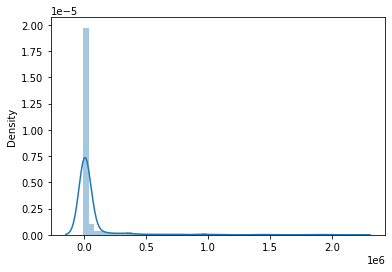

In [67]:
sns.distplot(predictions-y_test)

In [68]:
result_acc(predictions,False)

Mean absolute error = 56846.23
Mean squared error = 44250235448.71
Median absolute error = 5543.37
Explain variance score = -397161974324.88
R2 score = -428437995199.38


In [69]:
model = xgb.XGBClassifier(learning_rate=0.1,max_depth=6,n_estimators=500,n_jobs=-1,use_label_encoder=False)
model.fit(X_train,y_train)

XGBClassifier(max_depth=6, n_estimators=500, n_jobs=-1, use_label_encoder=False)

In [70]:
predictions = model.predict(X_test)
result_acc(predictions,True)

              precision    recall  f1-score   support

           0       0.89      0.99      0.93      1291
           1       0.32      0.04      0.07       171

    accuracy                           0.88      1462
   macro avg       0.60      0.51      0.50      1462
weighted avg       0.82      0.88      0.83      1462



In [71]:
classifier = KNeighborsClassifier(n_neighbors=1000)
classifier.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=1000)

In [72]:
predictions = classifier.predict(X_test)
result_acc(predictions,True)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1291
           1       0.00      0.00      0.00       171

    accuracy                           0.88      1462
   macro avg       0.44      0.50      0.47      1462
weighted avg       0.78      0.88      0.83      1462



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Conclusion**


1.   The regression model is not suitable for this binary classification problem.
2.   Both XGBClassifier and KNNClassifer can reach 91% accuracy.

